# Covid-19: Comparing cases and lockdowns in Berlin and Zurich

## 1. Data acquistion and wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import csv files
cases_de = pd.read_csv('covid_cases_de.csv')
cases_zh_raw = pd.read_csv('covid_cases_zh.csv')
vacc_global = pd.read_csv('covid_vaccinations_global.csv')
lockdowns = pd.read_csv('lockdowns.csv')

### Berlin data

In [3]:
cases_de.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1


In [4]:
# check for misisng values
cases_de.isnull().any()

state        False
county       False
age_group     True
gender        True
date         False
cases        False
deaths       False
recovered    False
dtype: bool

In [5]:
# filter for Berlin data, group by date
cases_be = cases_de[cases_de.state == 'Berlin'].groupby('date', as_index = False).sum()
cases_be.head()

,date,cases,deaths,recovered
0,2020-01-19,1,0,1
1,2020-02-29,1,0,1
2,2020-03-03,6,0,6
3,2020-03-04,3,0,3
4,2020-03-05,10,0,10


In [6]:
# check data types
cases_be.dtypes

date         object
cases         int64
deaths        int64
recovered     int64
dtype: object

In [7]:
# change data type of date column
cases_be.date = pd.to_datetime(cases_be.date)
# check data types
cases_be.dtypes

date         datetime64[ns]
cases                 int64
deaths                int64
recovered             int64
dtype: object

In [8]:
# check if date is continuous
date_diff = pd.DataFrame(cases_be.date.diff())
date_diff[date_diff.date != '1 days']

,date
0,NaT
1,41 days
2,3 days
140,2 days
153,2 days


In [9]:
cases_be.date.iloc[[139, 140, 152, 153]]

139   2020-07-18
140   2020-07-20
152   2020-08-01
153   2020-08-03
Name: date, dtype: datetime64[ns]

In [10]:
# create data frame for missing dates
missing_date = pd.DataFrame({'date': pd.Series('2020-07-19'), 'cases':  pd.Series(np.nan), 'deaths':  pd.Series(np.nan), 'recovered':  pd.Series(np.nan)})
missing_date.date = pd.to_datetime(missing_date.date)
cases_be = pd.concat([cases_be.iloc[:140], missing_date, cases_be.iloc[140:]])

missing_date = pd.DataFrame({'date': pd.Series('2020-08-02'), 'cases':  pd.Series(np.nan), 'deaths':  pd.Series(np.nan), 'recovered':  pd.Series(np.nan)})
missing_date.date = pd.to_datetime(missing_date.date)
cases_be = pd.concat([cases_be.iloc[:154], missing_date, cases_be.iloc[154:]])

cases_be.date.iloc[139:155]

139   2020-07-18
0     2020-07-19
140   2020-07-20
141   2020-07-21
142   2020-07-22
143   2020-07-23
144   2020-07-24
145   2020-07-25
146   2020-07-26
147   2020-07-27
148   2020-07-28
149   2020-07-29
150   2020-07-30
151   2020-07-31
152   2020-08-01
0     2020-08-02
Name: date, dtype: datetime64[ns]

In [11]:
cases_be = cases_be.fillna(method = 'bfill', axis = 0)
cases_be.iloc[139:155]

,date,cases,deaths,recovered
139,2020-07-18,19.0,0.0,19.0
0,2020-07-19,31.0,0.0,31.0
140,2020-07-20,31.0,0.0,31.0
141,2020-07-21,33.0,0.0,33.0
142,2020-07-22,27.0,0.0,27.0
143,2020-07-23,47.0,0.0,47.0
144,2020-07-24,61.0,0.0,61.0
145,2020-07-25,18.0,0.0,18.0
146,2020-07-26,3.0,0.0,3.0
147,2020-07-27,41.0,0.0,41.0


In [12]:
# calculate weekly rolling average for cases
roll_av = cases_be.rolling(7).mean()
cases_be = cases_be.assign(cases_av = roll_av['cases'])

In [13]:
# drop some dates to align with Zurich data
cases_be = cases_be[(cases_be.date > '2020-03-08') & (cases_be.date < '2021-05-31')].reset_index()

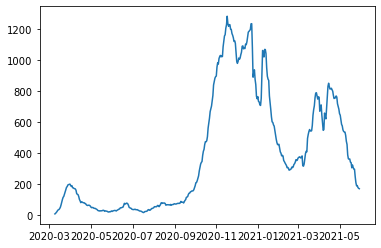

In [14]:
plt.plot(cases_be.date,cases_be.cases_av);

### Zurich data

In [15]:
cases_zh_raw.head()

,Week,Year,Area,AgeYearCat,Gender,NewConfCases,NewDeaths,Source
0,9,2020,Canton_ZH,0-9,F,0,0,https://gd.zh.ch/internet/gesundheitsdirektion...
1,9,2020,Canton_ZH,0-9,M,0,0,https://gd.zh.ch/internet/gesundheitsdirektion...
2,9,2020,Canton_ZH,10-19,F,0,0,https://gd.zh.ch/internet/gesundheitsdirektion...
3,9,2020,Canton_ZH,10-19,M,0,0,https://gd.zh.ch/internet/gesundheitsdirektion...
4,9,2020,Canton_ZH,20-29,F,1,0,https://gd.zh.ch/internet/gesundheitsdirektion...


In [16]:
# check for missing values
cases_zh_raw.isnull().any()

Week            False
Year            False
Area            False
AgeYearCat      False
Gender          False
NewConfCases    False
NewDeaths       False
Source          False
dtype: bool

In [17]:
# check data types
cases_zh_raw.dtypes

Week             int64
Year             int64
Area            object
AgeYearCat      object
Gender          object
NewConfCases     int64
NewDeaths        int64
Source          object
dtype: object

In [18]:
# group by date and repeat values for 7 days (only weekly cummulation available in dataset)
cases_zh = cases_zh_raw.groupby(['Year','Week'], as_index = False).sum()
cases_zh = pd.DataFrame(np.repeat(cases_zh.values,7,axis=0))
cases_zh.columns = ['year','week','cases','deaths']

In [19]:
#create date array for zh cases
date = np.arange('2020-02-24','2021-05-31',dtype = 'datetime64')

In [20]:
# insert date array into cases_zh and drop year and week columns
cases_zh['date'] = date
cases_zh.drop(columns = ['year','week'], axis = 0, inplace = True)

In [21]:
# calculate weekly rolling average for cases
roll_av = cases_zh.rolling(7).mean()
cases_zh = cases_zh.assign(cases_av = roll_av['cases'])

In [22]:
# drop some dates to align with Berlin data
cases_zh = cases_zh[cases_zh.date > '2020-03-08'].reset_index()

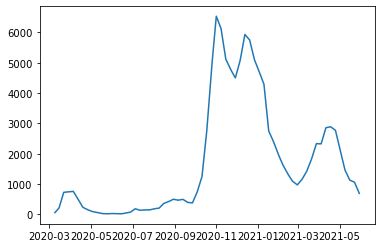

In [23]:
plt.plot(cases_zh.date,cases_zh.cases_av);